# Laboratory Session 4

## Exercise 1 - Six Boxes Toy Model : inference
Write an R program that:
1) allows the user to insert the color of a randomly extracted box and

2) prints on the standard output the probability of selecting each box

3) plots the probability for each box as a function of the extraction step

Black is 0, white is 1
The a priori probability of having chosen any of the boxes is $1/\text{#boxes} = 1/6$.

We want to calculate the posterior, given an extraction $E_i$, that the box $H_j$ was the source:
$$
p(H_j|E_i) = \frac{p(E_i|H_j)p(H_j)}{p(E_i)}
$$

Since $H_j$ has $j$ white balls, and 5 balls in total, the likelihood of extracting a white ball for each box is $j/5$. The probability $p(E_i)$ of extracting a white ball can be obtained from the marginal probability:
$$p(E_i) = \sum_j p(E_i,H_j)\\
= \sum_j p(E_i|H_j)p(H_j)$$ because of the product rule for probabilities.


$$
\begin{align}
p(H_j,E_1,E_2) &= p(H_j,E_1|E_2)p(E_2)=p(H_j|E_1,E_2)p(E_1)p(E_2)\\
&=p(E_1,E_2|H_j)p(H_j)=p(E_1|H_j)p(E_2|H_j)p(H_j)\\
\implies p(H_j|E_1,E_2)&=\frac{p(E_1|H_j)p(E_2|H_j)p(H_j)}{p(E_1)p(E_2)}\\
\therefore p(H_j|n)&=\frac{p(E_n|H_j)}{p(E_n)}p(H_j|n-1)
\end{align}
$$

In [183]:
six_boxes <- function(extractions){

    n_boxes <- 6
    box_size <- n_boxes-1
    # The prior is the same for each box
    p_box <- 1/n_boxes

    p_w <- sum(0:box_size)*p_box/box_size
    p_b <- 1 - p_w
    # with the assumption for the balls distribution
    
    prior <- p_box
    posteriors <- matrix(rep(prior,n_boxes*(length(extractions)+1)),c(length(extractions)+1,n_boxes))
    for(i in 1:length(extractions)){
        ex <- extractions[i]
        priors <- posteriors[i,]
        lhoods <- 1*ex+(-1)**ex*box_size:0/box_size
        almost_posts <- lhoods*priors
        evidence <- sum(almost_posts)
        posts <- almost_posts/evidence
        posteriors[i+1,] <- posts
    }
    
    for(j in 1:n_boxes){
        plot(0:length(extractions),posteriors[,j], main = j-1)
    }
}

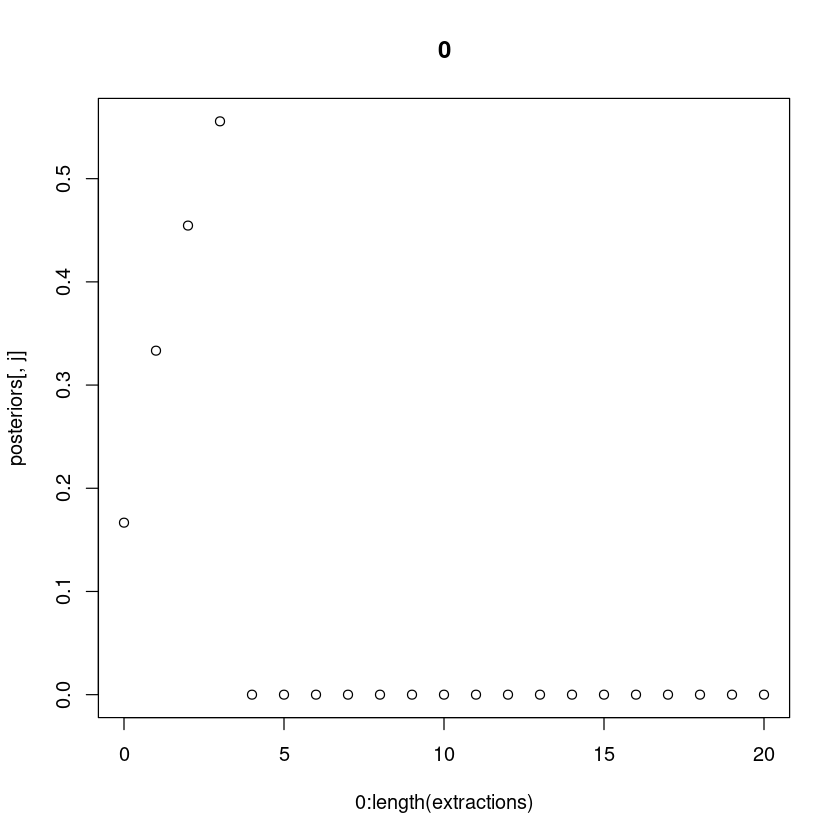

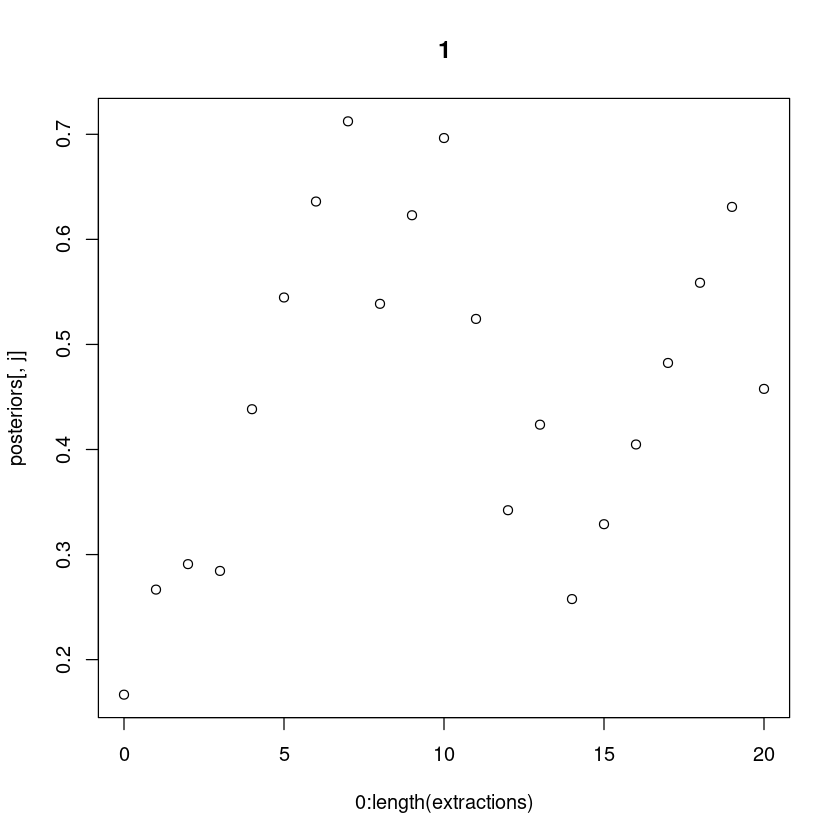

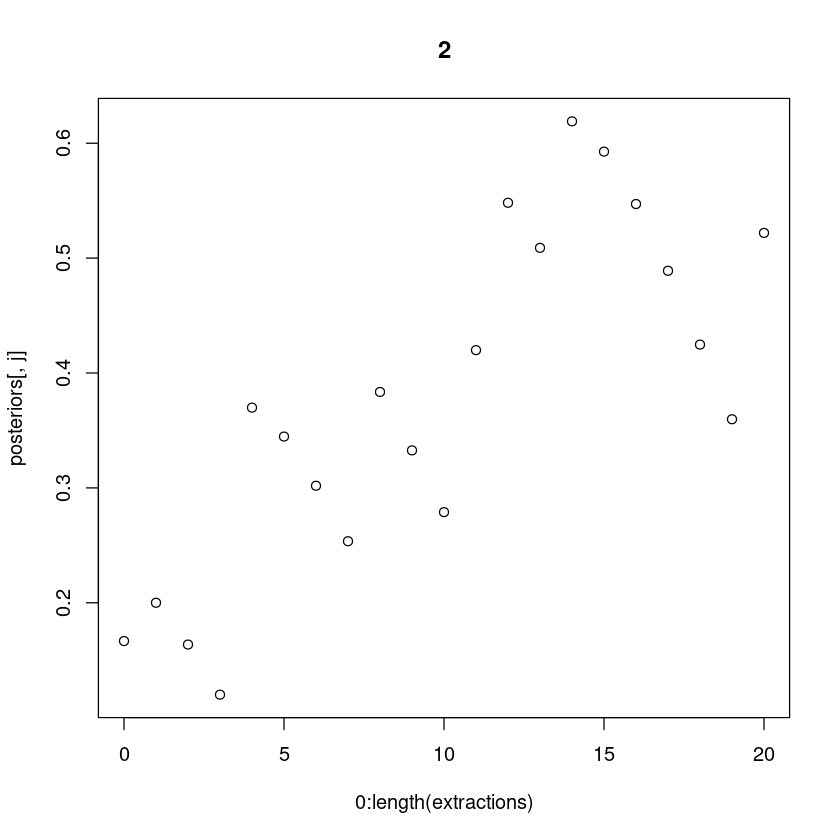

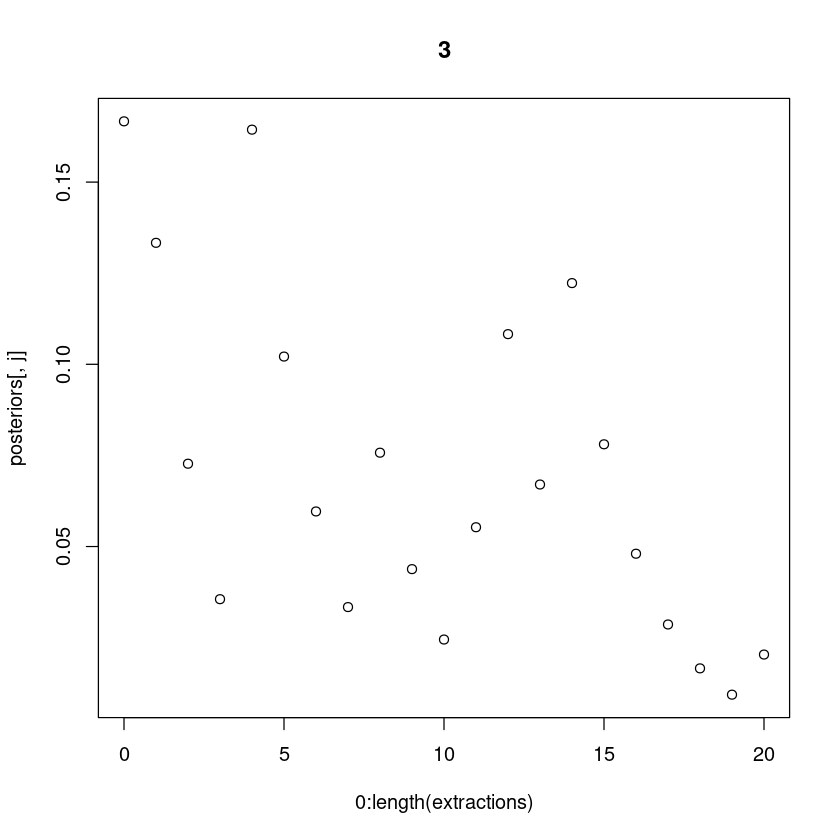

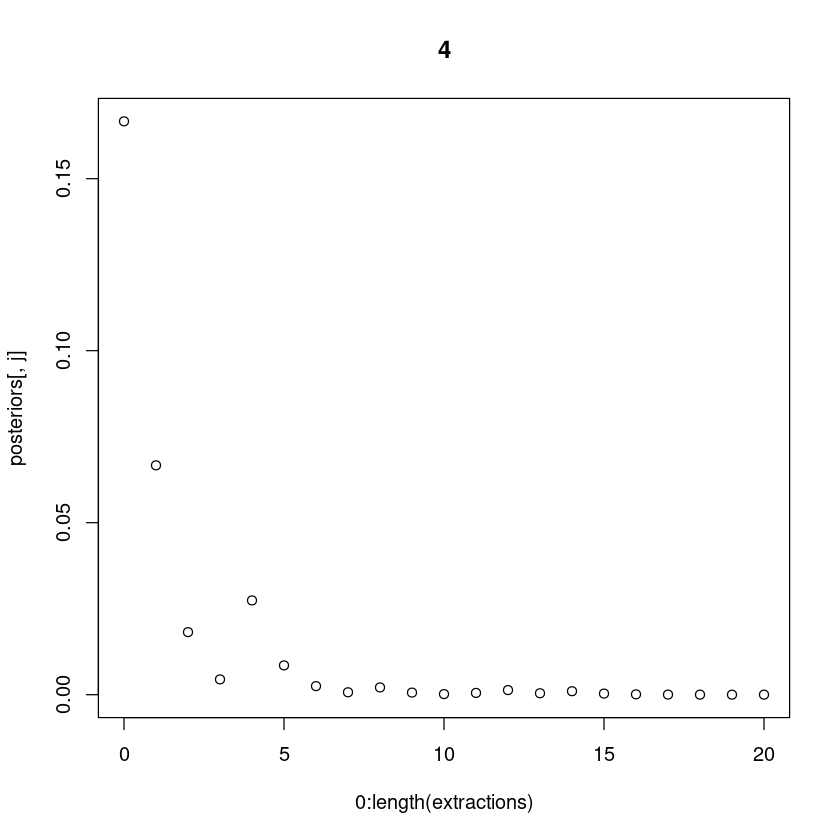

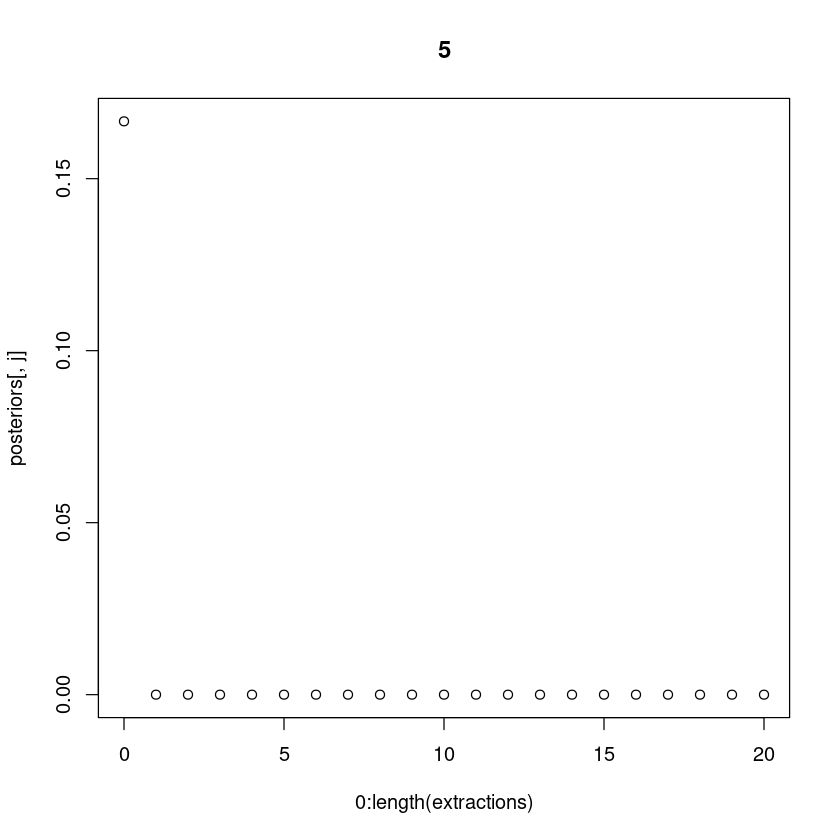

In [184]:
extraction <- sample(c(0,0,0,1,1),20,replace=TRUE)
six_boxes(extraction)

function (FUN, ..., MoreArgs = NULL, SIMPLIFY = TRUE, USE.NAMES = TRUE) 
{
    FUN <- match.fun(FUN)
    dots <- list(...)
    answer <- .Internal(mapply(FUN, dots, MoreArgs))
    if (USE.NAMES && length(dots)) {
        if (is.null(names1 <- names(dots[[1L]])) && is.character(dots[[1L]])) 
            names(answer) <- dots[[1L]]
        else if (!is.null(names1)) 
            names(answer) <- names1
    }
    if (!isFALSE(SIMPLIFY) && length(answer)) 
        simplify2array(answer, higher = (SIMPLIFY == "array"))
    else answer
}
<bytecode: 0x55ddedd27b00>
<environment: namespace:base>